## This notebook is meant to parse through text-rich data points using spacy

After being dissatisfied with the geo tagging on anniesremedies.com (i.e "African" for all of Africa or "Central and South American" etc.) I used spaCy's part-of-speech functionality to help identify where the herbs may be widely used in a more ganular way and idntify properties of these herbs by region. 


- <a href="#stop-words">Remove Stop Words and Punctuation</a><br>
- <a href="#stem">Lemmetization</a><br>
- <a href="#POS">Parts of Speech Identification</a><br>
- <a href="#region">Grouping into 3 regions</a><br>

In [405]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [292]:
df = pd.read_csv('herb_text_full.csv', lineterminator='\n')

In [293]:
df = df.fillna('')
#df.info = df.description + df.folklore

In [297]:
df.origins = df.origins.str.lower()

In [298]:
df.description = df.description + ' ' + df.folklore + ' ' + df.origins + ' ' + df.tags 

In [280]:
origins = ' '.join(df.origins.to_list())

In [299]:
df_text = df.loc[:, ['description' , 'link']]
#df_text[df_text.common_name.str.len() < 1]

In [255]:
df_text[df_text.description.str.contains('smok')]

,description,link
9,juniper closely resembles and like cypre...,juniperus communis juniper berries
32,herbalists have a high regard for the soothing...,passiflora incarnata passion flower
41,the humble oat epitomizes the concept of foo...,avena sativa oats
49,the ancient reputation that mullein enjoyed in...,verbascum mullein
70,lobelia acts as a relaxant in th...,lobelia inflata
72,many herbalists regard licorice as a natural a...,glycyrrhiza glabra licorice root
80,in this shrubs native habitat polynesi...,piper methysticum kava kava
120,gentian herb has been used in european and eas...,gentiana lutea
121,today garlic has found new respect from the mo...,allium sativum garlic
164,coltsfoot is used as a respiratory disinfecta...,tussilago farfara colt foot


<p><a name="stop-words"></a></p>

## remove stopwords & punc

In [310]:
df_text['raw_string'] = ""
for i in range(df_text.shape[0]):
    doc = nlp(df_text.description[i])
    #text = ""
    for token in doc:
        if (token.is_stop == False) & (token.is_alpha == True) & (token.is_punct == False):
            df_text.raw_string[i] += " " + str(token.text)


In [311]:
df_text.head()

,description,link,raw_string
0,avocados are a favorite food because of the hi...,persea americana avocado,avocados favorite food high fat content gives...
1,in appalachia an oil expressed from fr...,juglans cinerea butternut,appalachia oil expressed fresh butternut expe...
2,the aromatic and resinous leaves of the cypres...,cupressus sempervirens cypress oil,aromatic resinous leaves cypress tree produce...
3,in traditional chinese medicine only is mor...,angelica sinensis dong quai,traditional chinese medicine esteemed dong qu...
4,eyebright's main use in herbal medic...,euphrasia various species eyebright,eyebright main use herbal medicine culpepper ...


In [300]:
# doc = nlp(df_text.description[79])
# text = ""
# for token in doc:
#     if (token.is_stop == False) & (token.is_alpha == True):
#         df_text.description[79] += " " + str(token.text)
        

In [304]:
df_text.description.sample(10)

128    the chinese attributed  mysterious   propertie...
164    comfrey is a marvelous herb and is one of the ...
107                       grindelia is a bit scruffy ...
336    spirulina a popular   with good reason. spirul...
63                           spring tonics spring tonics
208    the key use of cajeput is to relieve stiff  ac...
279    amalaki is one of three fruits used in the ayu...
278      we tend to think of ginseng primarily as a c...
123    both garcinia cambogia and the extracted acid ...
74            introduced to the old world in the 17th...
Name: description, dtype: object

<p><a name="stem"></a></p>


## Stemming 

In [316]:
df_text['lemmas'] = ''
for i in range(df_text.shape[0]):   
    doc = nlp(df_text.raw_string[i])
    #lemmas = []
    #doc.token
    for token in doc:
        df_text.lemmas[i] += " " + token.lemma_
        

In [317]:
df_text.head()

,description,link,raw_string,lemmas
0,avocados are a favorite food because of the hi...,persea americana avocado,avocados favorite food high fat content gives...,avocados favorite food high fat content giv...
1,in appalachia an oil expressed from fr...,juglans cinerea butternut,appalachia oil expressed fresh butternut expe...,appalachia oil express fresh butternut expe...
2,the aromatic and resinous leaves of the cypres...,cupressus sempervirens cypress oil,aromatic resinous leaves cypress tree produce...,aromatic resinous leave cypress tree produc...
3,in traditional chinese medicine only is mor...,angelica sinensis dong quai,traditional chinese medicine esteemed dong qu...,traditional chinese medicine esteem dong qu...
4,eyebright's main use in herbal medic...,euphrasia various species eyebright,eyebright main use herbal medicine culpepper ...,eyebright main use herbal medicine culpeppe...


In [230]:
#df.tags[df['common_name'].str.contains('cado')].to_list()

[' arthritis  cholesterol  culinary kitchen  massage oils  north american  nutrition  skin care dieters cholesterol dry skin osteoarthritis']

<p><a name="POS"></a></p>


## Parts of speech

In [361]:
df_text['ADJ'] = ''
df_text['VERB'] = ''
df_text['PROPN'] = ''
df_text['NOUN'] = ''
df_text['NORP'] = ''
df_text['ORG'] = ''



In [362]:
for i in range(df_text.shape[0]):
    
    doc = nlp(df_text.lemmas[i])


    #text_dict_ = {}
    for token in doc:
        if token.pos_ == 'ADJ':
            df_text['ADJ'][i] += " " + str(token)
        if token.pos_ == 'VERB':
            df_text['VERB'][i] += " " + str(token)
        if token.pos_ == 'PROPN':
            df_text['PROPN'][i] += " " + str(token)
        if token.pos_ == 'NOUN':
            df_text['NOUN'][i] += " " + str(token)
    for ent in doc.ents:
        if ent.label_ == "NORP":
            df_text['NORP'][i] += " " + str(ent)
        if ent.label_ == "ORG":
            df_text['ORG'][i] += " " + str(ent)

In [363]:
df_text.sample(20)

,description,link,raw_string,lemmas,ADJ,VERB,PROPN,NOUN,NORP,ORG
187,because of it's extraordinarily gentle effecti...,matricaria recutita chamomile,extraordinarily gentle effectiveness chamomil...,extraordinarily gentle effectiveness chamom...,gentle endless nervous digestive anti inflamm...,traced grow buy contain relaxe alleviate add ...,herb choice muslin apple douche formula sitz ...,effectiveness chamomile home remedy list use ...,german german egyptians european vaginitis ge...,douche formula puffy eye cool chamomile gargl...
217,the leaves of the buchu are an effec...,agathosma betulina,leaves buchu effective antimicrobial anti inf...,leave buchu effective antimicrobial anti in...,effective inflammatory medicinal effective so...,leave treat heal indicate affect combine cont...,buchu antimicrobial anti buchu uti pms bladd ...,property buchu treatment infection buchu pros...,african african african african,uti uti kidney premenstrual uti uti kidney pr...
225,blueberries are a naturally delicious treat t...,vaccinium blueberries,blueberries naturally delicious treat enjoyed...,blueberry naturally delicious treat enjoy h...,delicious free different american special hig...,use suggest turn come suggest maintain consum...,blueberry specie north blueberry adapt thrive...,treat enjoy hesitation guilt pleasure interes...,north american european north american european,
105,many ancient texts extol the healing proper...,commiphora myrrha,ancient texts extol healing properties myrrh ...,ancient text extol healing property myrrh c...,ancient popular early antiseptic specific res...,healing continue prove make help find tinctur...,extol myrrh cleansing antifungal astringent m...,text property purifying agent remedy today ce...,african african,
67,north america north...,magnolia glauca,north america north america,north america north america,,,north america north america,,,
49,mustard is warming and stimulating to the d...,brassica nigra mustard,mustard warming stimulating digestive system ...,mustard warm stimulate digestive system mak...,warm digestive hot true medicinal pungent vol...,stimulate make know understand contain kill s...,mustard digest pungent taste aroma mustard no...,system food taste help food dog summer value ...,,asclepius demigod asclepius demigod
175,lemongrass is a well known medicinal herb in...,cymopogon citratus lemongrass,lemongrass known medicinal herb east widely t...,lemongrass know medicinal herb east widely ...,indonesian vietnamese mild diuretic digestive...,know promote insect know promote insect,medicinal herb east thai caribbean cook ayurv...,lemongrass grass pepper relief menstrual trou...,thai indonesian vietnamese diuretic thai indo...,
303,sweet woodruff is one of those herbs with a lo...,galium odoratum sweet woodruff,sweet woodruff herbs long tradition practical...,sweet woodruff herbs long tradition practic...,long practical little uncommon gentle commerc...,remedy strengthen make relaxing earn flavor w...,sweet woodruff herbs herbs shady garden sweet...,tradition use research document support folkl...,germans germans,
206,california poppy is one of the oldest ...,eschscholzia californica poppy,california poppy oldest north american remedi...,california poppy old north american remedy ...,north american high low dose different north ...,induce include sedate milder contain induce l...,california poppy old sleep aids dose californ...,remedy stress malady sensitivity change weath...,north american north american americans north...,
32,herbalists have a high regard for the soothing...,passiflora incarnata passion flower,herbalists high regard soothing properties pa...,herbalist high regard soothe property passi...,high general restful shingle flavonoid passio...,recommend approve relax prepare include inclu...,herbalist regard soothe nerve tonic treat com...,property passionflower use mind body night us...,native american native american,shingle alkaloid american european medicine o...


<p><a name="region"></a></p>


## Grouped by region (3)

In [446]:
df_greek = df_text[df_text.NORP.str.contains('greek')].reset_index()

In [367]:
#df_africa = df_text[df_text.NORP.str.contains('africa')]

In [379]:
df_egypt = df_text[df_text.NORP.str.contains('egypt')].reset_index()

In [376]:
df_native = df_text[df_text.NORP.str.contains('native')].reset_index()

In [416]:
def get_noun_text(df_full):    
    text_nouns = ''
    for i in range(df_full.shape[0]):
        text_nouns += ' ' + df_full.NOUN[i]
    return text_nouns


In [417]:
native_nouns = get_noun_text(df_native)

'  value detoxifying action body use reputation juniper range ailment juniper help water treat treat combination use fruit tea extract digestion indigestion ingredient agent increase urine flow balance juniper property treatment addition juniper congestion juniper berry range medicine chest part communis range decoction cause kidney trouble prevent flu aromatherapy bladder infection congestion detoxification care gout steam nerve pain urinary problem congestion value detoxifying action body use reputation juniper range ailment juniper help water treat treat combination use fruit tea extract digestion indigestion ingredient agent increase urine flow balance juniper property treatment addition juniper congestion juniper berry range medicine chest part communis range decoction cause kidney trouble prevent flu aromatherapy bladder infection congestion detoxification care gout steam nerve pain urinary problem congestion nerve  property passionflower use mind body night use post pain extract

In [395]:
egypt_nouns

'  myrtle tree plant number medicine myrtle infection problem congestion cough ayurveda treatment infection ancient wine treat fever infection recipe stomach bladder infection problem aromatherapy bronchitis myrtle tree plant number medicine myrtle infection problem congestion cough ayurveda treatment infection ancient wine treat fever infection recipe stomach bladder infection problem aromatherapy bronchitis  tradition sell pharmacy opinion horehound plant regard remedy herb ease gas horehound pain reliever system stimulant rhythm cough use herbalist liver remedy plant fever herb ordain supper gerard antidote posion dogge bite bronchitis cough throat cough digestion heart use tradition sell pharmacy opinion horehound plant regard remedy herb ease gas horehound pain reliever system stimulant rhythm cough use herbalist liver remedy plant fever herb ordain supper gerard antidote posion dogge bite bronchitis cough throat cough digestion heart  taste pick dill mouth water seed season prope

In [430]:
def word_freq(text):
    doc = nlp(text)
    word_frequencies = {}
    for word in doc:
        

        if word.text not in word_frequencies.keys():
            word_frequencies[word.text] = 1
        else:
            word_frequencies[word.text] += 1
    return word_frequencies

In [413]:
egypt_dict = word_freq(egypt_nouns)
del egypt_dict['use']
del egypt_dict['herb']
del egypt_dict['effect']

In [414]:
egypt_df = pd.DataFrame.from_dict((egypt_dict),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)

Text(0.5, 1.0, 'Egypt Popular Medicinal properties')

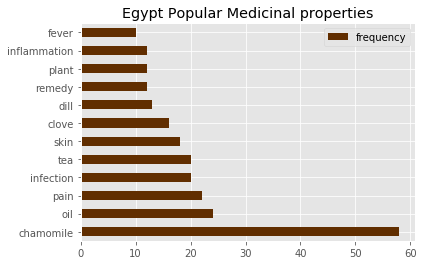

In [415]:
egypt_df.iloc[0:12,:].plot(kind = 'barh', color = '#612e00')
plt.title('Egypt Popular Medicinal properties')


In [431]:
native_nouns = get_noun_text(df_native)

In [442]:
native_dict = word_freq(native_nouns)
del native_dict[' ']
del native_dict['use']
del native_dict['help']
del native_dict['herb']
del native_dict['history']
del native_dict['medicine']

In [443]:
native_df = pd.DataFrame.from_dict((native_dict),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)

Text(0.5, 1.0, 'Native American Popular Medicinal properties')

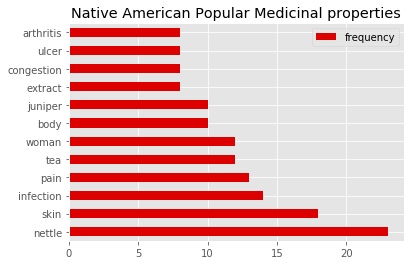

In [444]:
native_df.iloc[0:12,:].plot(kind = 'barh', color = '#dd0000')
plt.title('Native American Popular Medicinal properties')

In [447]:
greek_nouns = get_noun_text(df_greek)

In [464]:
greek_dict = word_freq(greek_nouns)
del greek_dict['use']
del greek_dict['problem']
del greek_dict['herb']
del greek_dict['time']
del greek_dict['oil']
del greek_dict[' ']
del greek_dict['herbalist']
del greek_dict['property']

In [465]:
greek_df = pd.DataFrame.from_dict((greek_dict),orient = 'index', columns= ["frequency"]).sort_values(by='frequency', ascending = False)

Text(0.5, 1.0, 'Greek Popular Medicinal properties')

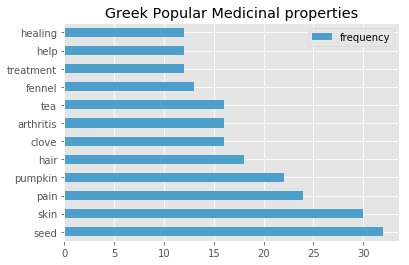

In [466]:
greek_df.iloc[0:12,:].plot(kind = 'barh', color = '#4d9fcc')
plt.title('Greek Popular Medicinal properties')

## df_text is only botanical name + all the text on that plant

In [318]:


doc = nlp(df_text.lemmas[45])

pos_list = []
named = []
ent_lst = []
#text_dict_ = {}
for token in doc:
    pos_list.append(token.pos_)
for ent in doc.ents:
    named.append(ent.label_)
    ent_lst.append(ent)


# list of all parts of speech
pos_list = list(set(pos_list))

# dictionary where all keys are unique parts of speech
text_dict_ = {pos:[] for pos in pos_list}

print(text_dict_.keys())
print(named)
print(set(ent_lst))


dict_keys(['ADP', 'ADJ', 'ADV', 'SPACE', 'VERB', 'PROPN', 'NOUN'])
['ORG', 'ORG', 'PERSON', 'PERSON', 'CARDINAL', 'PERSON', 'NORP', 'ORG', 'DATE', 'PERSON', 'ORG', 'ORG', 'ORG', 'PERSON', 'LAW', 'TIME', 'PERSON', 'CARDINAL', 'PERSON', 'NORP', 'ORG', 'DATE', 'PERSON', 'ORG', 'ORG', 'ORG', 'PERSON', 'LAW', 'TIME']
{nettle, sting nettle, overnight, nettle, libido longevity, alopecia baldness amenorrhea arthritis, alopecia baldness amenorrhea arthritis, overnight, bronchial nasal, bph, nettle, sting nettle, sting burn hair, menorrhagia nutrition osteoporosis pms prostate rheumatoid arthritis, nighttime, hormones fibromyalgia, monthly, menorrhagia nutrition osteoporosis pms prostate rheumatoid arthritis, native american, nighttime, libido longevity, native american, monthly, nettle, hormones fibromyalgia, bronchial nasal, sting nettle, bph, sting nettle}


In [319]:
text_dict_

{'ADP': [],
 'ADJ': [],
 'ADV': [],
 'SPACE': [],
 'VERB': [],
 'PROPN': [],
 'NOUN': []}

In [320]:
# adds words to type of wor key
for token in doc:
    text_dict_[token.pos_].append(token)


In [322]:
text_dict_

{'ADP': [nsaid, nsaid],
 'ADJ': [potent,
  long,
  best,
  complex,
  easy,
  natural,
  anti,
  open,
  bronchial,
  reliable,
  diuretic,
  nighttime,
  remarkable,
  useful,
  disparate,
  weak,
  irritated,
  frequent,
  ideal,
  anti,
  inflammatory,
  rich,
  strong,
  herbal,
  important,
  non,
  steroidal,
  anti,
  inflammatory,
  necessary,
  evil,
  scientific,
  acute,
  anti,
  inflammatory,
  common,
  large,
  tonic,
  female,
  native,
  american,
  good,
  general,
  tonic,
  female,
  reproductive,
  excellent,
  young,
  monthly,
  effective,
  clinical,
  nutraceutical,
  overnight,
  benign,
  good,
  round,
  vital,
  male,
  female,
  potent,
  long,
  best,
  complex,
  easy,
  natural,
  anti,
  open,
  bronchial,
  reliable,
  diuretic,
  nighttime,
  remarkable,
  useful,
  disparate,
  weak,
  irritated,
  frequent,
  ideal,
  anti,
  inflammatory,
  rich,
  strong,
  herbal,
  important,
  non,
  steroidal,
  anti,
  inflammatory,
  necessary,
  evil,
  sc

In [321]:
for text in text_dict_:
    print(text_dict_[text])
#     if text_dict_[text] == "arthritis":
#         print(text)

[nsaid, nsaid]
[potent, long, best, complex, easy, natural, anti, open, bronchial, reliable, diuretic, nighttime, remarkable, useful, disparate, weak, irritated, frequent, ideal, anti, inflammatory, rich, strong, herbal, important, non, steroidal, anti, inflammatory, necessary, evil, scientific, acute, anti, inflammatory, common, large, tonic, female, native, american, good, general, tonic, female, reproductive, excellent, young, monthly, effective, clinical, nutraceutical, overnight, benign, good, round, vital, male, female, potent, long, best, complex, easy, natural, anti, open, bronchial, reliable, diuretic, nighttime, remarkable, useful, disparate, weak, irritated, frequent, ideal, anti, inflammatory, rich, strong, herbal, important, non, steroidal, anti, inflammatory, necessary, evil, scientific, acute, anti, inflammatory, common, large, tonic, female, native, american, good, general, tonic, female, reproductive, excellent, young, monthly, effective, clinical, nutraceutical, overn

In [289]:
text_dict_.items()

dict_items([('ADJ', [popular, native, traditional, cardiotonic, phytochemical, long, alertness, important, social, African, african]), ('SPACE', [ ]), ('VERB', [explain, nuts, towering, thought, listed, having, duke, seeds, chewed, maintain, nuts, come]), ('PROPN', [kola, nuts, contain, africa, kola, database, cola, centuries, africa, libido]), ('NOUN', [caffeine, use, energy, tonics, tree, medicine, aphrodisiac, stimulant, properties, camel, traders, journeys, cola, ceremonies, cola, depression, fatigue])])

In [250]:
doc = nlp(text)

tag_list = []
#text_dict_ = {}
for token in doc:
    tag_list.append(token.tag_)


# list of all parts of speech
tag_list = list(set(tag_list))

# dictionary where all keys are unique parts of speech
text_dict_tag = {tag:[] for tag in tag_list}

print(text_dict_tag.keys())

for token in doc:
    text_dict_tag[token.tag_].append(token)
print(text_dict_tag.items())

dict_keys(['NNP'])
dict_items([('NNP', [NOUN])])


In [67]:
test_one = df[df.common_name.str.contains('mul')]
test_one

,common_name,description,folklore,link,medicinal_uses,origins,properties,tags
49,mullein,the ancient reputation that mullein enjoyed in...,NaN,verbascum mullein,"Congestion, Cough, Ear, Pet, Sore Throat, Sto...",NaN,"Anti-inflammatory, Antibacterial, AntiViral, ...","congestion, cough, ear, pet, sore throat, sto..."


In [68]:
test_one = test_one.T.squeeze()

In [57]:
type(test_one[2])

float

In [40]:
#!python -m spacy download en_core_web_sm
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [37]:
#nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [71]:
#nlp = spacy.load("en_core_web_sm")
doc = nlp(test_one[1])
origins = []

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)
    if token.pos_ == "NOUN":
        origins.append(token)

the the DET DT det xxx True True
ancient ancient ADJ JJ amod xxxx True False
reputation reputation NOUN NN nsubj xxxx True False
that that DET WDT mark xxxx True True
mullein mullein PROPN NNP nsubjpass xxxx True False
enjoyed enjoy VERB VBD acl xxxx True False
in in ADP IN prep xx True True
both both DET DT pobj xxxx True True
in in ADP IN prep xx True True
europe europe PROPN NNP pobj xxxx True False
and and CCONJ CC cc xxx True True
asia asia PROPN NNP conj xxxx True False
of of ADP IN prep xx True True
having have VERB VBG pcomp xxxx True False
    SPACE _SP    False False
the the DET DT det xxx True True
power power NOUN NN dobj xxxx True False
to to PART TO aux xx True True
exorcise exorcise VERB VB acl xxxx True False
evil evil ADJ JJ amod xxxx True False
spirits spirit NOUN NNS dobj xxxx True False
may may VERB MD aux xxx True True
be be AUX VB auxpass xx True True
attributed attribute VERB VBN relcl xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True Tru

In [72]:
origins

[reputation,
 power,
 spirits,
 mullein,
 oil,
 combination,
 oil,
 oil,
 ear,
 infections,
 combination,
 oil,
 garlic,
 ear,
 mites,
 fleas,
 itching,
 flowers,
 teas,
 coat,
 mullein,
 tones,
 lungs,
 healing,
 tissues,
 lungs,
 smoking,
 recover,
 smoking,
 herbs,
 tobacco,
 substitute,
 flowers,
 oil,
 pain,
 joints]